# Week 3 Data Preparation

## Load

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./bank-2.csv")
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [16]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

## Change the categorical to numeric

In [17]:
df_original = df

In [18]:
df = pd.get_dummies(df, columns=['job', 'marital', 'default','education','contact','month'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail()

,age,balance,housing,loan,day,duration,campaign,pdays,previous,poutcome,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,month_nan
1995,20.0,2785,no,no,16,327,2,-1,0,NaN,...,0,0,0,0,0,0,0,0,1,0
1996,28.0,127,no,no,16,1334,2,-1,0,NaN,...,0,0,0,0,0,0,0,0,1,0
1997,81.0,1154,no,no,17,231,1,-1,0,NaN,...,0,0,0,0,0,0,0,0,1,0
1998,46.0,4343,yes,no,20,185,1,-1,0,NaN,...,0,0,0,0,0,0,0,0,1,0
1999,40.0,6403,no,no,22,208,2,-1,0,NaN,...,0,0,0,0,0,0,0,0,1,0


In [19]:
df = pd.get_dummies(df, columns=['housing', 'loan', 'poutcome'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail()

,age,balance,day,duration,campaign,pdays,previous,subscribed,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,month_nan,housing_yes,housing_nan,loan_yes,loan_nan,poutcome_other,poutcome_success,poutcome_nan
1995,20.0,2785,16,327,2,-1,0,yes,0,0,...,0,1,0,0,0,0,0,0,0,1
1996,28.0,127,16,1334,2,-1,0,yes,0,0,...,0,1,0,0,0,0,0,0,0,1
1997,81.0,1154,17,231,1,-1,0,yes,0,0,...,0,1,0,0,0,0,0,0,0,1
1998,46.0,4343,20,185,1,-1,0,yes,0,0,...,0,1,0,1,0,0,0,0,0,1
1999,40.0,6403,22,208,2,-1,0,yes,0,1,...,0,1,0,0,0,0,0,0,0,1


In [20]:
df.isna().sum()

age                    12
balance                 0
day                     0
duration                0
campaign                0
pdays                   0
previous                0
subscribed              0
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
job_nan                 0
marital_married         0
marital_single          0
marital_nan             0
default_yes             0
default_nan             0
education_secondary     0
education_tertiary      0
education_nan           0
contact_telephone       0
contact_nan             0
month_aug               0
month_dec               0
month_feb               0
month_jan               0
month_jul               0
month_jun               0
month_mar               0
month_may               0
month_nov               0
month_oct   

## Fill in missing values

In [21]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [22]:
df.isna().sum()

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
subscribed             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
marital_married        0
marital_single         0
marital_nan            0
default_yes            0
default_nan            0
education_secondary    0
education_tertiary     0
education_nan          0
contact_telephone      0
contact_nan            0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0


In [23]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,month_nan,housing_yes,housing_nan,loan_yes,loan_nan,poutcome_other,poutcome_success,poutcome_nan
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,...,2000.000000,2000.000000,2000.0,2000.000000,2000.0,2000.000000,2000.0,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500,0.149000,0.02250,0.017500,...,0.046500,0.067000,0.0,0.481500,0.0,0.125000,0.0,0.073500,0.222000,0.227000
std,12.686108,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735,0.356178,0.14834,0.131158,...,0.210618,0.250085,0.0,0.499783,0.0,0.330802,0.0,0.261021,0.415695,0.418997
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000


In [24]:
df.head(5)

,age,balance,day,duration,campaign,pdays,previous,subscribed,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,month_nan,housing_yes,housing_nan,loan_yes,loan_nan,poutcome_other,poutcome_success,poutcome_nan
0,32.0,392,1,957,2,131,2,no,0,0,...,0,0,0,1,0,0,0,0,0,0
1,39.0,688,1,233,2,133,1,no,0,0,...,0,0,0,1,0,1,0,0,0,0
2,59.0,1035,1,126,2,239,1,no,0,0,...,0,0,0,1,0,1,0,0,0,0
3,47.0,398,1,274,1,238,2,no,1,0,...,0,0,0,1,0,1,0,0,0,0
4,54.0,1004,1,479,1,307,1,no,0,0,...,0,0,0,1,0,0,0,0,0,0


## Outlier Detection and Treatment

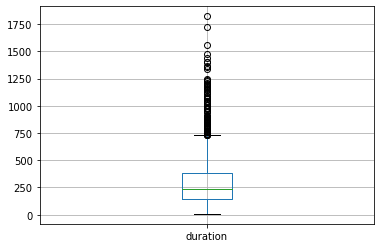

In [39]:
df.boxplot(column=['duration',])
plt.show()

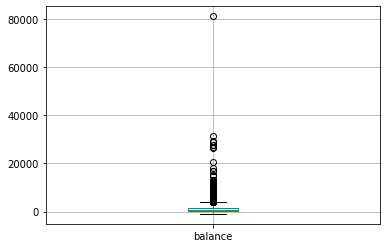

In [37]:
df.boxplot(column=['balance'])
plt.show()

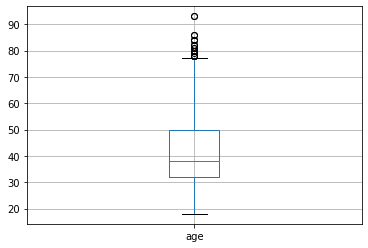

In [38]:
df.boxplot(column=['age'])
plt.show()

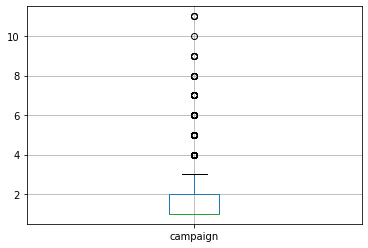

In [40]:
df.boxplot(column=['campaign'])
plt.show()

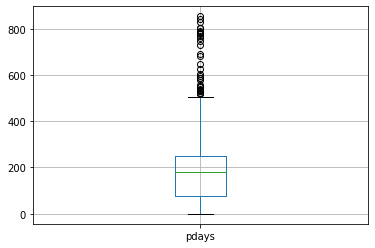

In [41]:
df.boxplot(column=['pdays'])
plt.show()

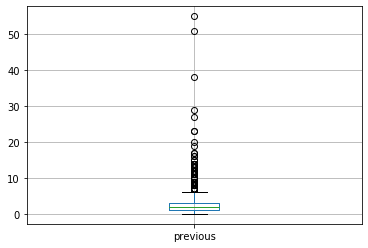

In [42]:
df.boxplot(column=['previous'])
plt.show()

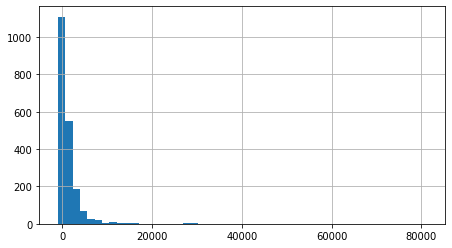

In [48]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
df['balance'].hist(bins=50)

In [35]:
df[['balance']].min()

balance   -980
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


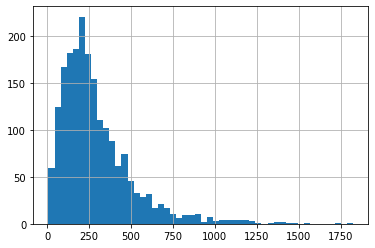

In [43]:
ax1 = fig.add_subplot(1, 2, 1)
df['duration'].hist(bins=50)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


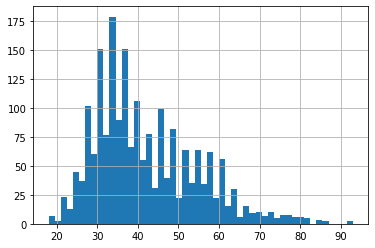

In [44]:
ax1 = fig.add_subplot(1, 2, 1)
df['age'].hist(bins=50)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


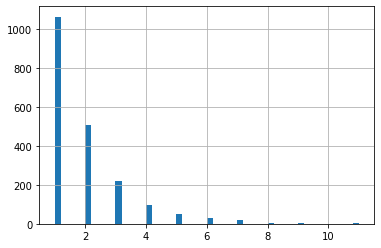

In [45]:
ax1 = fig.add_subplot(1, 2, 1)
df['campaign'].hist(bins=50)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


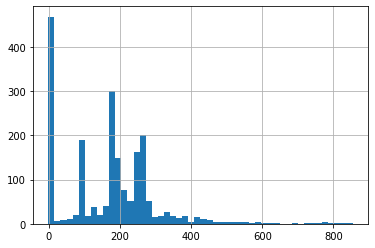

In [46]:
ax1 = fig.add_subplot(1, 2, 1)
df['pdays'].hist(bins=50)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


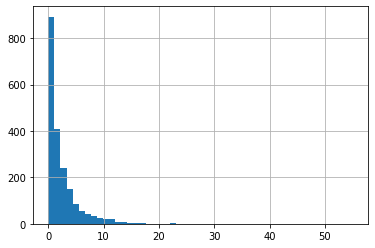

In [47]:
ax1 = fig.add_subplot(1, 2, 1)
df['previous'].hist(bins=50)

In [50]:
df[['balance', 'previous','pdays']].describe()

,balance,previous,pdays
count,2000.000000,2000.000000,2000.000000
mean,1413.663500,2.561500,167.896000
std,3131.224213,3.400735,131.754126
min,-980.000000,0.000000,-1.000000
25%,201.500000,1.000000,75.750000
50%,551.000000,2.000000,182.000000
75%,1644.500000,3.000000,251.000000
max,81204.000000,55.000000,854.000000


## Rescaling feature to log scale

In [51]:
df['balance'] = np.log(df['balance']+1000)
df['previous'] = np.log(df['previous']+1)
df['pdays'] = np.log(df['pdays']+2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


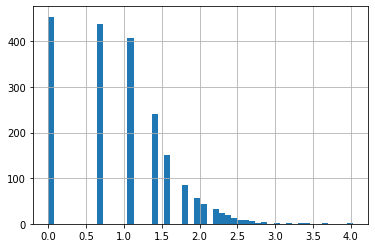

In [52]:
ax1 = fig.add_subplot(1, 2, 1)
df['previous'].hist(bins=50)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


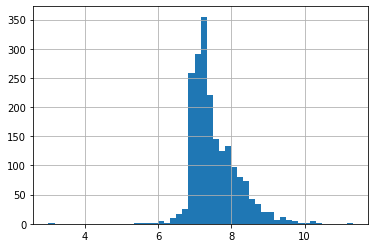

In [53]:
ax1 = fig.add_subplot(1, 2, 1)
df['balance'].hist(bins=50)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


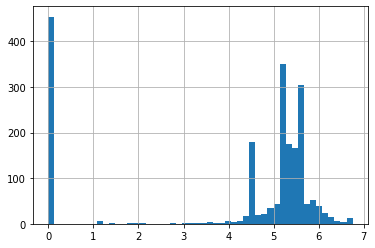

In [54]:
ax1 = fig.add_subplot(1, 2, 1)
df['pdays'].hist(bins=50)

In [55]:
df.isna().sum()

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
subscribed             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
marital_married        0
marital_single         0
marital_nan            0
default_yes            0
default_nan            0
education_secondary    0
education_tertiary     0
education_nan          0
contact_telephone      0
contact_nan            0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0


## Creating new feature from 3 existing feature

In [56]:
df['Finance_negative_history'] = df['housing_yes'] + df['housing_nan'] + df['loan_yes'] + df['loan_nan'] + df['default_yes'] + df['default_nan']

In [57]:
df.isna().sum()

age                         0
balance                     0
day                         0
duration                    0
campaign                    0
pdays                       0
previous                    0
subscribed                  0
job_blue-collar             0
job_entrepreneur            0
job_housemaid               0
job_management              0
job_retired                 0
job_self-employed           0
job_services                0
job_student                 0
job_technician              0
job_unemployed              0
job_nan                     0
marital_married             0
marital_single              0
marital_nan                 0
default_yes                 0
default_nan                 0
education_secondary         0
education_tertiary          0
education_nan               0
contact_telephone           0
contact_nan                 0
month_aug                   0
month_dec                   0
month_feb                   0
month_jan                   0
month_jul 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


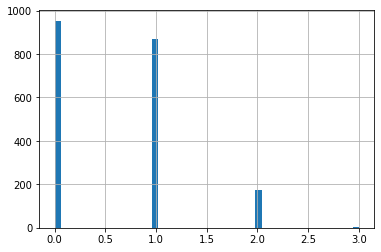

In [58]:
ax1 = fig.add_subplot(1, 2, 1)
df['Finance_negative_history'].hist(bins=50)

Text(0, 0.5, 'Number of Applicants')

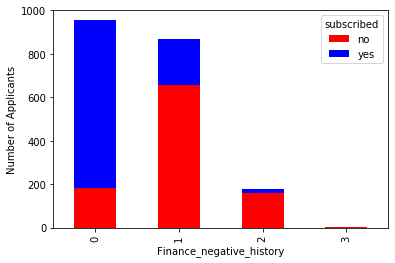

In [59]:
crosstab_CL = pd.crosstab(df['Finance_negative_history'], df['subscribed'])
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Applicants')

In [60]:
df[['Finance_negative_history']] = np.log(df['Finance_negative_history']+1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


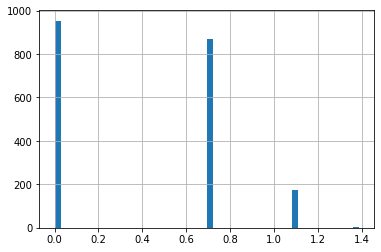

In [61]:
ax1 = fig.add_subplot(1, 2, 1)
df['Finance_negative_history'].hist(bins=50)

## Saving the new dataset

In [62]:
df.to_csv('loans_train_prepared.csv')